# Monday exercises II

## Group actions

### Exercise 1

(a) Define $2\times 2$ matrices $R$ and $S$. $R$ is supposed to rotate a vector 90 degrees ($\frac{\pi}{2}$-radians) in the counter-clockwise direction. $S$ gives the mirror image through the $x$-axis.

In [2]:
import numpy as np

In [133]:
# Fill inn your solution. We will use this R and S later.
def get_R():
    """Returns a 2x2 matrix that rotates the input vector by 90 degreees in the counter-clockwise direction."""
    return np.array([[0, -1], [1, 0]])

def get_S():
    """Returns a 2x2 matrix that mirrors the input vector around the x-axis."""
    return np.array([[1, 0], [0, -1]])

R, S = get_R(), get_S()

print(f"Rotation matrix R:\n{R}")
print()
print(f"Mirror matrix S:\n{S}")

Rotation matrix R:
[[ 0 -1]
 [ 1  0]]

Mirror matrix S:
[[ 1  0]
 [ 0 -1]]


(b) Generate a random set in $\mathbb{R}^2$  of 100 points so that you can show the effect of multiplying these points with $R$ and $S$ before and after. Multiplication here refers to multiplication of a matrix and a vector. The output should not look similar for $R$ and $S$. Plot the original points and their image after applying $R$ and $S$ in the same plot. What do you want to avoid in order for them to look different?

In [4]:
# Might be helpful
import matplotlib.pyplot as plt

In [167]:
# Write your solution
np.random.seed(42)
n = 100
dim = 2

x_shift = np.zeros((dim, n))
x_shift[0, :] = 2
x_shift[1, :] = 6
x = np.random.randn(dim, n) + x_shift

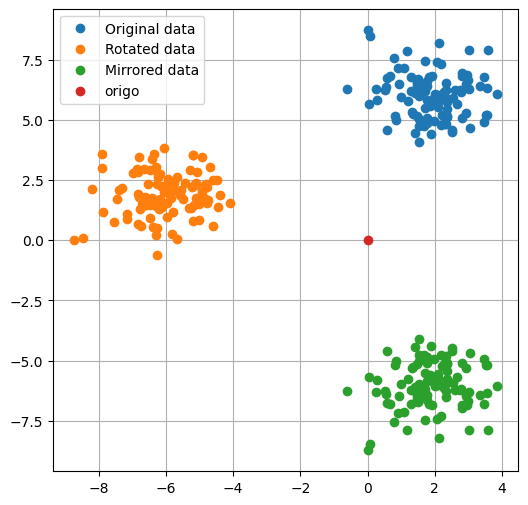

In [168]:
plt.figure(figsize=(6, 6))
plt.plot(x[0, :], x[1, :], 'o', label='Original data')
plt.plot((R@x)[0, :], (R@x)[1, :], 'o', label='Rotated data')
plt.plot((S@x)[0, :], (S@x)[1, :], 'o', label='Mirrored data')
plt.plot(0, 0, "o", c="tab:red", label="origo")
plt.grid()
plt.legend()
plt.show()

**What do you want to avoid in order for them to look different?**

- The data should not be on a linear line going through origo

### Exercise 2

In this exercise, we are again trying to understand groups using matrix multiplication.

(a) Write a function that does the following:
* Takes as input a list $List0$ of square $2\times 2$ matrices.
* Make a new list $List1$ of matrices that which includes $List0$ but adjoins all possible products by matrix multiplication from $List0$. Do not add matrices that are already in the list.
* Continue this procedure until either there are no new matrices or until the list has reached 100 elements (or some other upper threshold that you might prefer).


In [169]:
# Write your solution

def get_possible_products(List0, max_num = 100):
    # Copy the input list
    List1 = List0.copy()
    
    # Continue until we have reached the maximum number of matrices
    # This will make it possible for higher products to be calculated
    while True:
        # Boolean value to check if we have added any new matrices
        any_new_matrices = False
        
        for i in range(len(List1)):
            for j in range(len(List1)):
                # For each matrix in List1, calculate the product with all other matrices in List1
                new_matrix = List1[i] @ List1[j]
                
                # Check is the new matrix is already in List1
                if not any(np.allclose(new_matrix, mat) for mat in List1):
                    List1.append(new_matrix)
                    any_new_matrices = True
        
        # Check if we have reached the maximum number of matrices
        # or if we have not added any new matrices
        if any_new_matrices is False or len(List1) >= max_num:
            break
        
    return List1

(b) Test your function by implementing it with the list with $R$ and $S$. What is the output $G$? Is $G$ a group?

In [170]:
# Write your solution
G = get_possible_products([R, S])

print(f"Number of possible products from [R, S]: {len(G)}")

Number of possible products from [R, S]: 8


In [171]:
G

[array([[ 0, -1],
        [ 1,  0]]),
 array([[ 1,  0],
        [ 0, -1]]),
 array([[-1,  0],
        [ 0, -1]]),
 array([[0, 1],
        [1, 0]]),
 array([[ 0, -1],
        [-1,  0]]),
 array([[1, 0],
        [0, 1]]),
 array([[-1,  0],
        [ 0,  1]]),
 array([[ 0,  1],
        [-1,  0]])]

**Is $G$ a group?**
- Closed. As all product of each member in the group as already in G.
- Associativity. As we are considering square matrices.
- Identity. Yes, as the identiymatrix is a member of G
- Inverse? Yes, see code under. We have that all matrices has one diagonal of zeros and one with non-zeros enteries. Thus the determiant will always be non-zero.

This are in general true for all list, as long as the matrices are invertible!

In [172]:
# Check that each element in G are invertible
for i in range(len(G)):
    matrix = G[i]
    matrix_inv = np.linalg.inv(matrix)
    
    assert np.allclose(matrix @ matrix_inv, matrix_inv @ matrix), f"Matrix {i} is not invertible"  

(c) For $G$ as in 2(b), update your point cloud from 1(b) so that it will be different under each group element in $G$.

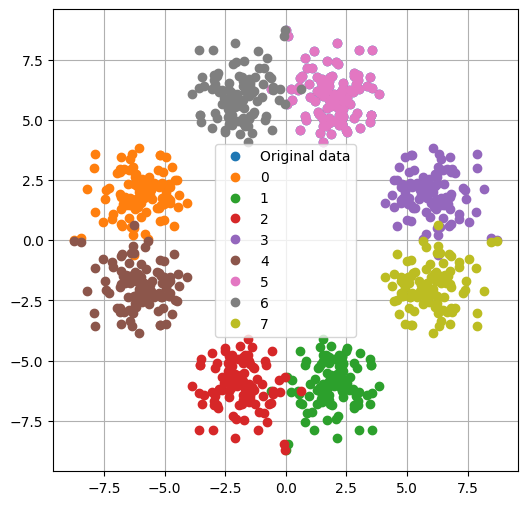

In [173]:
# Write your solution. What do you need to change for your point cloud.
plt.figure(figsize=(6, 6))
plt.plot(x[0, :], x[1, :], 'o', label='Original data')

for i, M in enumerate(G):
    plt.plot((M@x)[0, :], (M@x)[1, :], 'o', label=f"{i}")
plt.grid()
plt.legend()
plt.show()

(d) Test your function with the list only containing the matrix
$$P = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}.$$
Check that this is not a group.

If the process stops withing the time-limit, how can we not end up with a group? Can you modify the code to check if it is possible, and give an error if this is not the case.

In [130]:
# What do you get? What can go wrong?

P = np.array([[1, 0], [0, 0]])
H = get_possible_products([P])

print(f"Number of possible products from [P]: {len(H)}")

Number of possible products from [P]: 1


I observe that the final List only contains P. Thus we know that the list satisfied
- closed
- associativity
- identity

however it does not nessecaraly satifies the identity requirement - as the determinent is zero with only one non-zero entry.

## Rotation and reflection group

(a) Recall the definition of the rotation matrix $R$ ($90^{\circ}$ rotation) and mirroring $S$ along the $x$-axis.
Define the group $D_4$ as pairs of tuple $(r,s)$, $r=0,1,2,3$, $s=0,1$ such that
$$(r_1, s_1) \cdot (r_2, s_2) = (r_3,s_3) \qquad \text{if} \qquad R^{r_1} S^{s_1} R^{r_2} S^{s_2} = R^{r_3} S^{s_3}.$$
Show that
$$(r_1 ,s_1) \cdot (r_2, s_2) = (r_1 +(-1)^{s_1} r_2 \bmod 4, s_1+s_2 \bmod 2).$$
What is the identity? Find the formula for the inverse.

In [131]:
# Fill in your answer. Hint: If you reflect, then rotate, how can you achieve
#the same result with first rotating then reflecting?

Have that 
$$ R \cdot S = - S \cdot R $$
such that
$$
\begin{align*}
    R^{r_1} S^{s_1} R^{r_2} S^{s_2} 
    &= R^{r_1} \left( S^{s_1} R^{r_2} \right) S^{s_2} \\
    &= R^{r_1} \left( (-1)^{s_1} R^{r_2} S^{s_1} \right) S^{s_2} \\
\end{align*}
$$

Moreover, we have that $ R \cdot R = - \mathbb{I}$, thus $-R = R^{-1}$. Inserting gives

$$
\begin{align*}
    R^{r_1} S^{s_1} R^{r_2} S^{s_2} 
    &= R^{r_1} \left( (-1)^{s_1} R^{r_2} S^{s_1} \right) S^{s_2} \\
    &= R^{r_1} \left( R^{(-1)^{s_1} r_2} S^{s_1} \right) S^{s_2} \\
    &= R^{r_1 + (-1)^{s_1}r_2} S^{s_1 + s_2} \\
\end{align*}
$$

Finaly, use that $R^4 = \mathbb{I}$, $S^2 = \mathbb{I}$. We get
$$
\begin{align*}
    R^{r_1} S^{s_1} R^{r_2} S^{s_2} 
    &= R^{r_1 + (-1)^{s_1}r_2} S^{s_1 + s_2} \\
    &= R^{r_1 + (-1)^{s_1}r_2 \text{ mod } 4} S^{s_1 + s_2 \text{ mod } 2} \\
    &= (r_1 + (-1)^{s_1}r_2 \text{ mod } 4, s_1 + s_2 \text{ mod } 2)
\end{align*}
$$


**For the identity:**

We can construct the identity in multiple ways. For instance 
- $R^4 = \mathbb{I}$ giving $(4 \text{ mod } 4, 0) = (0, 0)$
- $S^2 = \mathbb{I}$ giving $(0, 2 \text{ mod } 2) = (0, 0)$

Thus the identity is uniquely determined by $$(r, s) = (0, 0)$$


**For the inverse:**

$$
\begin{align*}
    (r, s)^{-1} 
    &= (R^{r} S^{s})^{-1} \\
    &= S^{-s} R^{-r}  \\
\end{align*}    
$$
Use that $S \cdot S = \mathbb{I} = S^{-1} S$ and $R \cdot R = -\mathbb{I} = -R^{-1} \cdot R$, thus
$$
\begin{align*}
    (r, s)^{-1} 
    &= - S^{s} R^{r}  \\
\end{align*}    
$$
Finally, we have earlier shown that commutation is antisynmetric
$$
\begin{align*}
    (r, s)^{-1} 
    &= - S^{s} R^{r}  \\
    &= (-1)(-1)^{s}R^{r} S^{s}  \\
    &= (-1)^{s+1}R^{r} S^{s}  \\
    &= R^{(-1)^{s-1}r} S^{s}  \\
    &= ((-1)^{s-1}r, s)
\end{align*}    
$$


(b) Make a class D4 representing the group, which as a defined method defined for product and inverse.

In [178]:
class D4:
    def __init__(self, rs):
        self.r_max = 4
        self.s_max = 1
        self.representations = [(r, s) for r in range(self.r_max) for s in range(self.s_max)]
        
        # check if the input is a valid representation
        if rs not in self.representations:
            raise ValueError(f"Invalid representation {rs}.")
        
        self.rs = rs
        
    # Overwrite the multiplication method
    def __mul__(self, other):
        pass
    
    # Overwrite the __repr__ method to make it easier to print the object
    def __repr__(self):
        return f"D4({self.rs})"

In [ ]:
# Test with some examples

(c) Make a function $f(g,img)$, where $g$ is in your new class `D4` and $img$ is an image and where the output is the action of $D4$ on the image. You can use standard functions in `cv2` for mirroring and translations. Test it on an image, showing all the configurations.

In [ ]:
import cv2

In [ ]:
def Action(a,image):
    # What to fill inn
    
    return img
        

In [ ]:
# Show your group action